In [1]:
print("hello")

hello


[*********************100%***********************]  1 of 1 completed


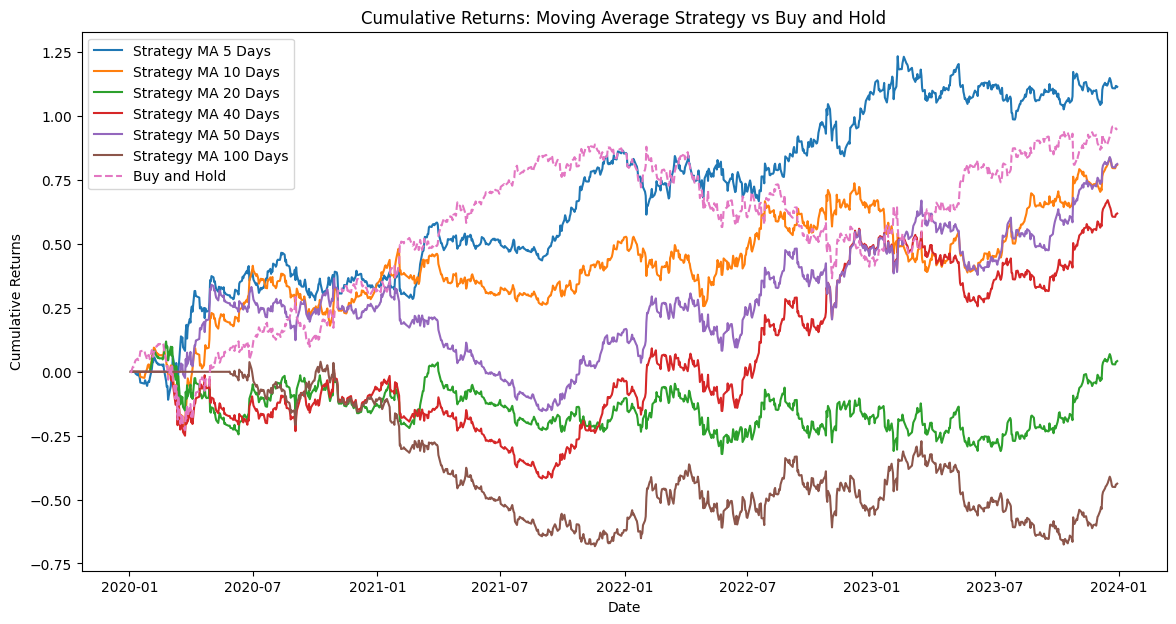

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Download Tesla stock data
ticker = "GOOG"
start_date = "2020-01-01"
end_date = "2024-01-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate moving averages
def calculate_moving_average(data, window):
    return data['Adj Close'].rolling(window=window).mean()

# Strategy implementation
def moving_average_strategy(data, ma_window):
    data['MA'] = calculate_moving_average(data, ma_window)
    data['Signal'] = 0
    data['Signal'][ma_window:] = np.where(data['MA'][ma_window:] > data['Adj Close'][ma_window:], 1, -1)
    data['Position'] = data['Signal'].shift(1)  # Shift to avoid lookahead bias
    data['Strategy Returns'] = data['Position'] * data['Adj Close'].pct_change()
    return data

# Backtesting the strategy
def backtest_strategy(data):
    # Calculate Buy and Hold returns
    data['Buy and Hold Returns'] = data['Adj Close'].pct_change().cumsum()
    
    # Calculate Strategy returns
    data['Cumulative Strategy Returns'] = data['Strategy Returns'].cumsum()
    
    return data

# Test the strategy with different moving averages
moving_average_windows = [5,10,20,20,40, 50, 100]
results = {}

for window in moving_average_windows:
    strategy_data = moving_average_strategy(data.copy(), window)
    backtested_data = backtest_strategy(strategy_data)
    results[window] = backtested_data

# Plotting the results
plt.figure(figsize=(14, 7))

for window, result in results.items():
    plt.plot(result['Cumulative Strategy Returns'], label=f'Strategy MA {window} Days')
    
plt.plot(result['Buy and Hold Returns'], label='Buy and Hold', linestyle='--')
plt.title('Cumulative Returns: Moving Average Strategy vs Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [4]:
data = yf.download("MSFT", start=start_date, end=end_date)

Failed to get ticker 'MSFT' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001B687361390>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSFT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
